In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/Users/dontw/Downloads/titanic-passengers.csv",sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [37]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df["Embarked"].fillna('S',inplace=True)
df=df.drop(['Cabin','PassengerId','SibSp','Ticket','Name','Embarked','Parch'],axis=1)
df['Age']=df['Age'].astype(int)

In [38]:
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0}) 
df["Sex"]=df["Sex"].map({"male": 1, "female": 0}) 

In [39]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,2,1,28,13.0000
1,0,3,1,25,7.6500
2,0,3,1,20,7.8542
3,0,3,0,29,21.0750
4,0,1,1,31,52.0000
...,...,...,...,...,...
886,1,2,0,14,30.0708
887,0,3,1,22,7.2292
888,0,3,0,30,8.6625
889,0,3,1,28,7.8958


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = df[['Pclass', 'Sex','Age','Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


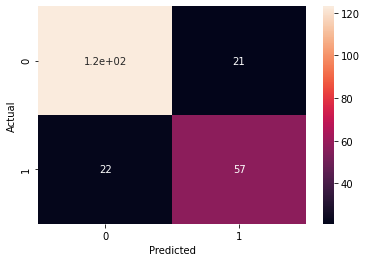

In [43]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)